## **1 Author:**

**Student Name :** Ankita Shukla

**Student Id:** 230227307

##**2 Problem formulation**

**Using the MLEnd Yummy Dataset, build a machine learning pipeline that takes as an input a photo of a dish that has either rice or chips and predicts whether the picture has rice or chips.**

From a higher level, this looks like an easy problem because rice and chips are very distinctive in themselves and white or yellow colur hue could be used to correctly identify them. But these are not alone in the dataset; for instance, chips are always present with burgers, tacos etc and rice is mixed with curry or meat which makes the problem a little complex and very interesting.

##**3 Machine Learning pipeline**

The Machine Learning Pipeline can be described into the following steps:

*   **Setting up Data:** Using MLEND library, yummy dataset is downloaded that contains 3250 images and a CSV file with their attributes. I added an attribute Rice_or_chips and only selected the dishes that either contained rice or chips, ignoring the rest

*  **Defining Training and Test datasets:** We load the dataset using yummy_load function of MLEND and that gives us Training and Test dataset

*   **Modifying Train and Test sets:** Added a field 'Y_encoded' to both TrainSet and TestSet that sets value 0 to chips and 1 to rice.

*   **Preprocessing Images:** All images are different sizes; so all are transformed into a square and resized into a standard size. All images are then added to numpy arrays: X_train and X_test which will be used as Training and Test data for next steps

*   **Feature Extractions:** We extract and take advantage of yellow and white colours present in an image and GMLC features

*   **Model Selection:** Various models like SCV, RandomForest are tried and used to train and evaluate the model.


*   **Evaluation:** The selected models were evaluated based on accuracy and confusion matrix


**Mounting the Google Drive**

In [ ]:
# Mounting the Google Drive
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spkit as sp

from skimage import exposure
from skimage.color import rgb2hsv, rgb2gray
import skimage as ski

import mlend
from mlend import download_yummy, yummy_load

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

drive.mount('/content/drive')

Mounted at /content/drive


**Downloading the Yummy Data**

In [ ]:
# Downloading the whole yummy data
baseDir = download_yummy(save_to = '/content/drive/MyDrive/Data/MLEnd')
baseDir

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|3250\3250|003250.jpg
Done!


'/content/drive/MyDrive/Data/MLEnd/yummy'

In [ ]:
os.listdir(baseDir) # Location of folder

['MLEndYD_images',
 'MLEndYD_image_attributes_benchmark_full_data.csv',
 'MLEndYD_image_attributes_benchmark.csv']

In [161]:
# Please note that MLEndYd_image_attributes_benchmark.csv needs to be modified to only contain images with rice or chips and a label: Rice_or_Chips.
# I've attached a CSV file called MLEndYD_image_attributes_benchmark_rice_chips with my submission.
# Please replace the original with that for this to pick the correct dataset

MLENDYD_df = pd.read_csv('/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_image_attributes_benchmark.csv').set_index('filename')
MLENDYD_df

Rice_or_chips            Diet     Cuisine_org         Cuisine  \
filename                                                                   
000001.jpg          Rice  non_vegetarian        japanese        japanese   
000016.jpg          Rice           vegan          indian          indian   
000020.jpg          Rice      vegetarian          indian          indian   
000021.jpg          Rice  non_vegetarian           asian           asian   
000022.jpg          Rice      vegetarian          indian          indian   
...                  ...             ...             ...             ...   
003236.jpg         Chips  non_vegetarian  german/turkish  german_turkish   
003243.jpg          Rice      vegetarian         british         british   
003244.jpg          Rice      vegetarian         italian         italian   
003246.jpg          Rice      vegetarian          indian          indian   
003247.jpg          Rice      vegetarian          indian          indian   

                                         Dish_name Home_or_restaurant  \
filename                                                                
000001.jpg                      chicken_katsu_rice      marugame_udon   
000016.jpg                                 khichdi               home   
000020.jpg  lentil-based_vegetable_stew_with__rice               home   
000021.jpg                                 biryani               home   
000022.jpg                     rice_beetroot_curry               home   
...                                            ...                ...   
003236.jpg                      german_doner_kebab                gdk   
003243.jpg                pan-fried_beef_with_rice         restaurant   
003244.jpg                                 khichdi               home   
003246.jpg                              zeera_rice               home   
003247.jpg                          paneer_and_dal               home   

                                                  Ingredients  \
filename                                                        
000001.jpg              rice,chicken_breast,spicy_curry_sauce   
000016.jpg                                  rice,spices,herbs   
000020.jpg  ingredients:\nfor_cooking_rice:\n1_cup_rice_(a...   
000021.jpg  mutton,rice,onion,tomato,red_chilli_powder,sal...   
000022.jpg                          rice,beetroot,salt,spices   
...                                                       ...   
003236.jpg  lettuce,tomato,onion,red_cabbage,bread,yoghurt...   
003243.jpg                         rice,corn,beef,red_cabbage   
003244.jpg  rice,split_yellow_mung_beans,salt,cumin_seeds,...   
003246.jpg  1_cup_basmati_rice,2_cups_water,2_tablespoons_...   
003247.jpg  fried_cottage_cheese,ghee,lentils,milk,wheat_f...   

           Healthiness_rating  Healthiness_rating_int       Likeness  \
filename                                                               
000001.jpg            neutral                     3.0           like   
000016.jpg            healthy                     4.0        neutral   
000020.jpg            healthy                     4.0           like   
000021.jpg            healthy                     4.0  strongly_like   
000022.jpg       very_healthy                     5.0        neutral   
...                       ...                     ...            ...   
003236.jpg          unhealthy                     2.0  strongly_like   
003243.jpg            healthy                     4.0        dislike   
003244.jpg            healthy                     4.0        neutral   
003246.jpg            healthy                     4.0  strongly_like   
003247.jpg            healthy                     4.0  strongly_like   

            Likeness_int Benchmark_A  
filename                              
000001.jpg           4.0       Train  
000016.jpg           3.0        Test  
000020.jpg           4.0        Test  
000021.jpg           5.0       Train  
000022.jpg           3.0       Train  
...             

In [ ]:
sample_path = '/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images/*.jpg'
files = glob.glob(sample_path)
len(files)

3250

**Defining Training and Test Sets**

In [162]:
# Please note that MLEndYd_image_attributes_benchmark.csv needs to be modified to only contain images with rice or chips and a label: Rice_or_Chips.
# I've attached a CSV file called MLEndYD_image_attributes_benchmark_rice_chips with my submission.
# Please replace the original with that for this to pick the correct dataset
# This is because if we load a different csv, then 'attributes_as_label' argument doesn't work correctly.


TrainSet, TestSet, Map = yummy_load(datadir_main=baseDir,attributes_as_labels=['Rice_or_chips'],train_test_split='Benchmark_A')

Total 3250 found in /content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images/


In [ ]:
# Adding true values to Train and Test sets. Rice attains value 1 and Chips 0

Y_encoded = np.where(TrainSet['Y']['Rice_or_chips'] == 'Rice', 1, 0)
TrainSet['Y_encoded'] = Y_encoded


Y_encoded = np.where(TestSet['Y']['Rice_or_chips'] == 'Rice', 1, 0)
TestSet['Y_encoded'] = Y_encoded

In [ ]:
# plotting all the labels in the training dataset using the values 'chips' and 'rice'
TrainSet['Y']

Rice_or_chips
0            Rice
3            Rice
4            Rice
5           Chips
6            Rice
..            ...
761          Rice
763         Chips
764          Rice
765          Rice
766          Rice

[522 rows x 1 columns]

In [ ]:
# Plotting the labels encoded using the values 0 and 1:

TrainSet['Y_encoded']


array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [ ]:
X_train_paths = TrainSet['X_paths']
X_test_paths  = TestSet['X_paths']

Y_train = TrainSet['Y_encoded']
Y_test  = TestSet['Y_encoded']

Rice


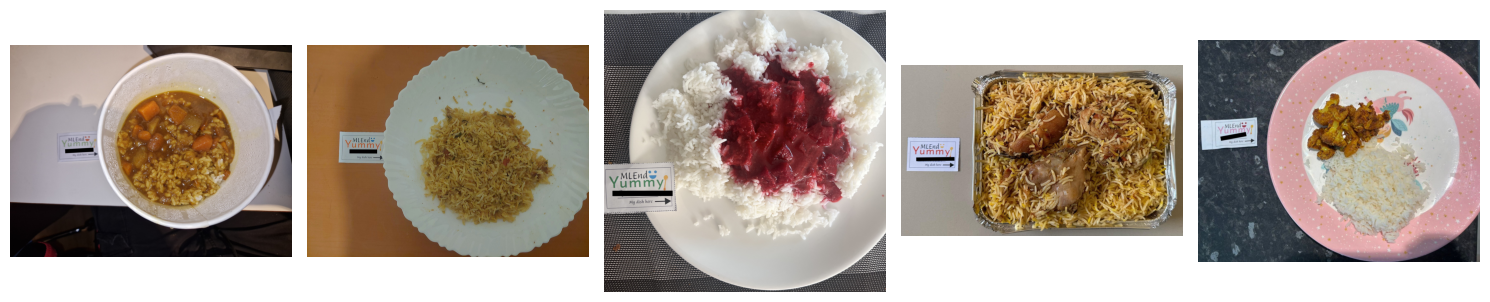

Chips


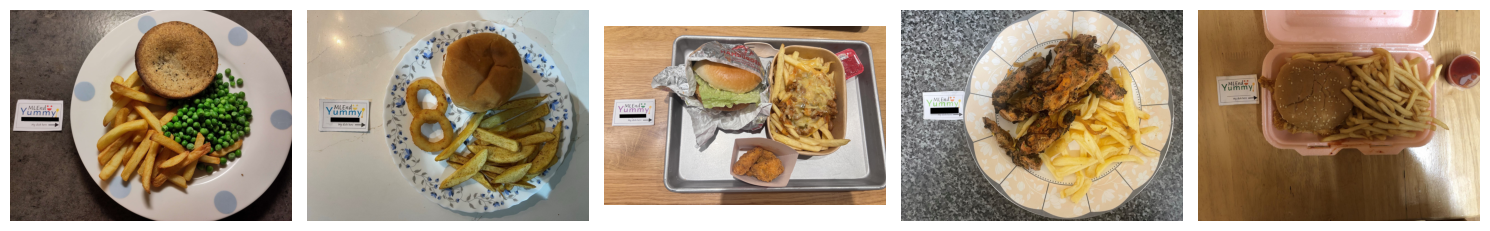

In [ ]:
# Visualising dishes
Chips_Img = np.array(X_train_paths)[Y_train==0]
Rice_Img = np.array(X_train_paths)[Y_train==1]

print('Rice')
plt.figure(figsize=(15,5))
for k,file in enumerate(Rice_Img[:5]):
  I = plt.imread(file)
  plt.subplot(1,5,k+1)
  plt.imshow(I)
  plt.axis('off')

plt.tight_layout()
plt.show()

print('Chips')
plt.figure(figsize=(15,5))
for k,file in enumerate(Chips_Img[:5]):
  I = plt.imread(file)
  plt.subplot(1,5,k+1)
  plt.imshow(I)
  plt.axis('off')

plt.tight_layout()
plt.show()

**Resizing Images**

In [ ]:
def make_it_square(I, pad=0):
  N,M,C = I.shape
  if N>M:
    Is = [np.pad(I[:,:,i], [(0,0),(0, N-M)], 'constant', constant_values=pad) for i in range(C)]
  else:
    Is = [np.pad(I[:,:,i], [(0, M-N),(0,0)], 'constant', constant_values=pad) for i in range(C)]

  return np.array(Is).transpose([1,2,0])

def resize_img(I,size=[100,100]):
  N,M,C = I.shape
  Ir = [sp.core.processing.resize(I[:,:,i],size) for i in range(C)]
  return np.array(Ir).transpose([1,2,0])

**Creating TrainSet and TestSet (of type numpy.array) with normalised images.**

In [ ]:
X_train = []
for k,file in enumerate(X_train_paths):
  sp.utils.ProgBar_JL(k,len(X_train_paths),L=50,color='blue')
  I = plt.imread(file)
  I = make_it_square(I, pad=0)
  I = resize_img(I,size=[200,200])
  X_train.append(I)


X_test = []
for k,file in enumerate(X_test_paths):
  sp.utils.ProgBar_JL(k,len(X_test_paths),L=50,color='blue')
  I = plt.imread(file)
  I = make_it_square(I, pad=0)
  I = resize_img(I,size=[200,200])
  X_test.append(I)

X_train = np.array(X_train)
X_test = np.array(X_test)
X_train.shape, X_test.shape

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|522\522|
Done!
100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|246\246|
Done!


((522, 200, 200, 3), (246, 200, 200, 3))

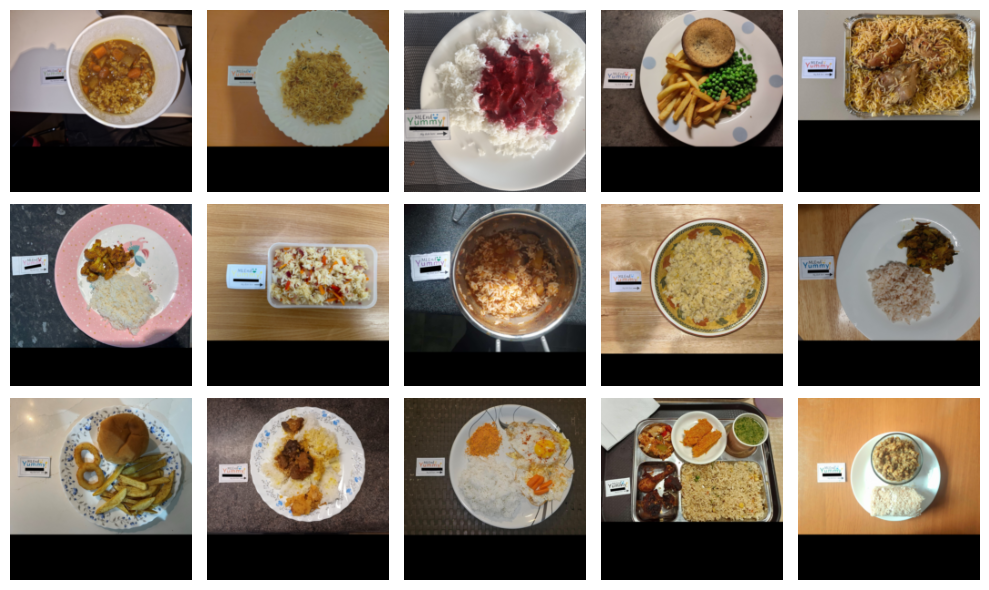

In [ ]:
# Plotting a few images after resizing:

plt.figure(figsize=(10,6))
for k,I in enumerate(X_train):
  plt.subplot(3,5,k+1)
  plt.imshow(I)
  plt.axis('off')
  k+=1
  if k>=15:break
plt.tight_layout()
plt.show()

##**4 Transformation stage**

**Feature Extraction**

*   Using Yellow Colour Component in the Image
*   Using White Colour Component in the Image
*   Using 'dissimilarity' and 'correlation' GMLC features

**Input**
* Taking input as the images resized in the above step

**Output**
* Output is a training set with the features used in feature extraction


**Normalising**
*  Normalising using Mean and Standard deviation



In [ ]:
from skimage.feature import ORB
from skimage.feature import graycomatrix, graycoprops


def get_yellow_component(I,t1=27, t2=33):
  Ihsv = (rgb2hsv(I)*255).astype('uint8')
  mask = (Ihsv[:,:,0]<t2)*(Ihsv[:,:,0]>t1)
  Ypx = mask.sum()
  return Ypx

def get_white_component(I, t1=0, t2=10):
    Ihsv = (rgb2hsv(I) * 255).astype('uint8')
    # Adjust conditions to target white color
    mask = (Ihsv[:,:,1] < t2) & (Ihsv[:,:,2] > t1)
    Wpx = mask.sum()
    return Wpx

def GMLC_features(I):
  Ig = (rgb2gray(I)*255).astype('uint8')
  glcm = graycomatrix(Ig, distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)
  f1 = graycoprops(glcm, 'dissimilarity')[0, 0]
  f2 = graycoprops(glcm, 'correlation')[0, 0]
  return f1,f2


def showConfMat(CM, labels = ['Chips','Rice']):
  plt.matshow(CM,cmap='Blues')
  for i in range(CM.shape[0]):
    for j in range(CM.shape[1]):
      plt.text(i,j,CM[i,j].round(2),ha='center',)
  plt.xticks([0,1],labels)
  plt.yticks([0,1],labels)
  plt.show()

In [ ]:
# now extract the three features from each image and create the transform sets X_train_f and X_test_f:

X_train_f = []
for k, I in enumerate(X_train):
  f1 = get_yellow_component(I)
  f2,f3 = GMLC_features(I)
  # f4 = get_white_component(I)
  X_train_f.append([f1,f2,f3])

X_test_f = []
for k, I in enumerate(X_test):
  f1 = get_yellow_component(I)
  f2,f3 = GMLC_features(I)
  # f4 = get_white_component(I)
  X_test_f.append([f1,f2,f3])

In [ ]:
#After formatting both X_train_f and X_test_f as numpy arrays, we can check their respective shapes:

X_train_f = np.array(X_train_f)
X_test_f = np.array(X_test_f)
X_train_f.shape, X_test_f.shape

((522, 3), (246, 3))

In [ ]:
# Normalising

MEAN = X_train_f.mean(0)
SD = X_train_f.std(0)

X_train_fn = (X_train_f - MEAN)/SD
X_test_fn = (X_test_f - MEAN)/SD

#**5 Modelling**

Models used:
* LinearSVC Model
* Decision Tree
* Random Forest

Training Accuracy of Linear SVC Model:	 0.8160919540229885
Test  Accuracy of Linear SVC Model:	 0.7926829268292683




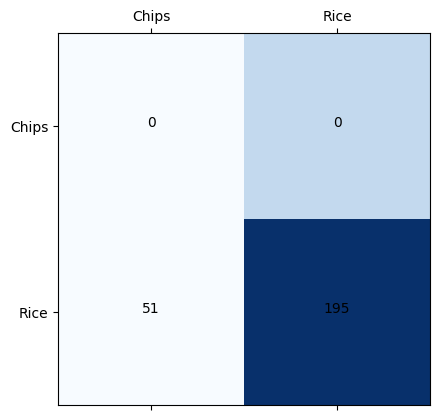

In [ ]:
# LinearSVC Model and Confusion Matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix


model = LinearSVC(C=1)
model.fit(X_train_fn, Y_train)


ytp = model.predict(X_train_fn)
ysp = model.predict(X_test_fn)

train_accuracy = np.mean(ytp==Y_train)
test_accuracy  = np.mean(ysp==Y_test)

print('Training Accuracy of Linear SVC Model:\t', train_accuracy)
print('Test  Accuracy of Linear SVC Model:\t', test_accuracy)
print("\n")

# Calculate the confusion matrix
CM = confusion_matrix(Y_test, ysp)

showConfMat(CM)


Training Accuracy of Decision Tree Model:	 1.0
Test  Accuracy of Decision Tree Model:	 0.6788617886178862




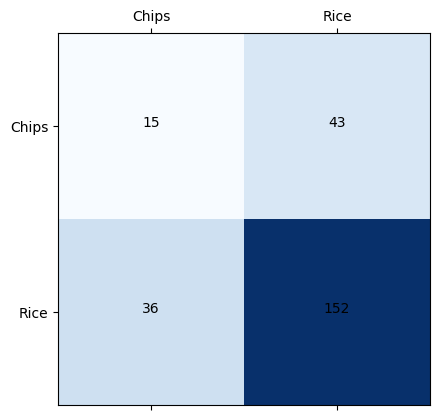

In [164]:
# Decision Tree Model

model = DecisionTreeClassifier(random_state=42)

model.fit(X_train_fn, Y_train)

ytp = model.predict(X_train_fn)
ysp = model.predict(X_test_fn)

train_accuracy = np.mean(ytp==Y_train)
test_accuracy  = np.mean(ysp==Y_test)

print('Training Accuracy of Decision Tree Model:\t', train_accuracy)
print('Test  Accuracy of Decision Tree Model:\t', test_accuracy)
print("\n")

# Calculate the confusion matrix
CM = confusion_matrix(Y_test, ysp)

showConfMat(CM)

Training Accuracy of Random Forest Model:	 1.0
Test  Accuracy of Random Forest Model:	 0.7804878048780488




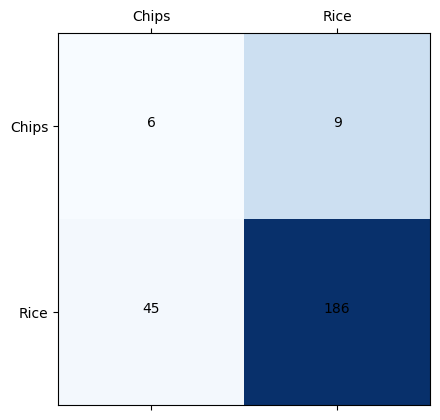

In [165]:
# Random Forest Model

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier


model = RandomForestClassifier(n_estimators=500, random_state=42)
model.fit(X_train_fn, Y_train)


ytp = model.predict(X_train_fn)
ysp = model.predict(X_test_fn)

train_accuracy = np.mean(ytp==Y_train)
test_accuracy  = np.mean(ysp==Y_test)

print('Training Accuracy of Random Forest Model:\t', train_accuracy)
print('Test  Accuracy of Random Forest Model:\t', test_accuracy)
print("\n")

# Calculate the confusion matrix
CM = confusion_matrix(Y_test, ysp)

showConfMat(CM)

In [ ]:
# Choosing the ebst Hyperparameter

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Create the RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_fn, Y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


Random Forest Model with best Hyperparameter :

Training Accuracy of Random Forest Model:	 0.8563218390804598
Test  Accuracy of Random Forest Model:	 0.7845528455284553




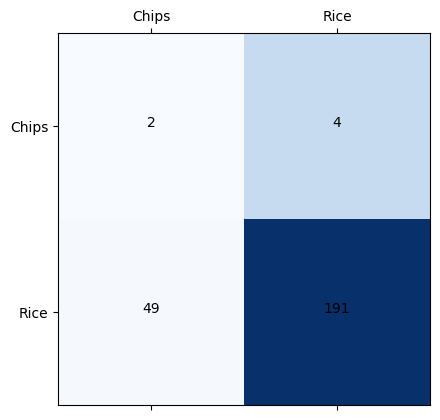

In [166]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier


best_rf_clf = RandomForestClassifier(**best_params, random_state=42)
best_rf_clf.fit(X_train_fn, Y_train)


ytp = best_rf_clf.predict(X_train_fn)
ysp = best_rf_clf.predict(X_test_fn)

train_accuracy = np.mean(ytp==Y_train)
test_accuracy  = np.mean(ysp==Y_test)

print('Training Accuracy of Random Forest Model:\t', train_accuracy)
print('Test  Accuracy of Random Forest Model:\t', test_accuracy)
print("\n")

# Calculate the confusion matrix
CM = confusion_matrix(Y_test, ysp)

showConfMat(CM)

# Methodology

First, I manually edited my dataset by adding a new label where it says if the image consist of rice or chips. Then, I have trained my 70% of the data and tested it on the rest 30% of the data.
I have assesssed my model by finding out its accuracy and confusion matrix.


# Dataset

I've manually edited the MLEnd Yummy Dataset. I've added a new label to the dataset as 'Rice_or_chips' and used the csv which cotains rice or chips. I've ignored the images from training that din't contain either.

I've showed some of the visualisations below.


In [ ]:
# Dataset used :
MLENDYD_df = pd.read_csv('/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_image_attributes_benchmark.csv').set_index('filename')
MLENDYD_df


Rice_or_chips            Diet     Cuisine_org         Cuisine  \
filename                                                                   
000001.jpg          Rice  non_vegetarian        japanese        japanese   
000016.jpg          Rice           vegan          indian          indian   
000020.jpg          Rice      vegetarian          indian          indian   
000021.jpg          Rice  non_vegetarian           asian           asian   
000022.jpg          Rice      vegetarian          indian          indian   
...                  ...             ...             ...             ...   
003236.jpg         Chips  non_vegetarian  german/turkish  german_turkish   
003243.jpg          Rice      vegetarian         british         british   
003244.jpg          Rice      vegetarian         italian         italian   
003246.jpg          Rice      vegetarian          indian          indian   
003247.jpg          Rice      vegetarian          indian          indian   

                                         Dish_name Home_or_restaurant  \
filename                                                                
000001.jpg                      chicken_katsu_rice      marugame_udon   
000016.jpg                                 khichdi               home   
000020.jpg  lentil-based_vegetable_stew_with__rice               home   
000021.jpg                                 biryani               home   
000022.jpg                     rice_beetroot_curry               home   
...                                            ...                ...   
003236.jpg                      german_doner_kebab                gdk   
003243.jpg                pan-fried_beef_with_rice         restaurant   
003244.jpg                                 khichdi               home   
003246.jpg                              zeera_rice               home   
003247.jpg                          paneer_and_dal               home   

                                                  Ingredients  \
filename                                                        
000001.jpg              rice,chicken_breast,spicy_curry_sauce   
000016.jpg                                  rice,spices,herbs   
000020.jpg  ingredients:\nfor_cooking_rice:\n1_cup_rice_(a...   
000021.jpg  mutton,rice,onion,tomato,red_chilli_powder,sal...   
000022.jpg                          rice,beetroot,salt,spices   
...                                                       ...   
003236.jpg  lettuce,tomato,onion,red_cabbage,bread,yoghurt...   
003243.jpg                         rice,corn,beef,red_cabbage   
003244.jpg  rice,split_yellow_mung_beans,salt,cumin_seeds,...   
003246.jpg  1_cup_basmati_rice,2_cups_water,2_tablespoons_...   
003247.jpg  fried_cottage_cheese,ghee,lentils,milk,wheat_f...   

           Healthiness_rating  Healthiness_rating_int       Likeness  \
filename                                                               
000001.jpg            neutral                     3.0           like   
000016.jpg            healthy                     4.0        neutral   
000020.jpg            healthy                     4.0           like   
000021.jpg            healthy                     4.0  strongly_like   
000022.jpg       very_healthy                     5.0        neutral   
...                       ...                     ...            ...   
003236.jpg          unhealthy                     2.0  strongly_like   
003243.jpg            healthy                     4.0        dislike   
003244.jpg            healthy                     4.0        neutral   
003246.jpg            healthy                     4.0  strongly_like   
003247.jpg            healthy                     4.0  strongly_like   

            Likeness_int Benchmark_A  
filename                              
000001.jpg           4.0       Train  
000016.jpg           3.0        Test  
000020.jpg           4.0        Test  
000021.jpg           5.0       Train  
000022.jpg           3.0       Train  
...             

Here, visualising the images that I've have extracted from the new MLEnd Yummy Dataset. Where all the images containing 'rice' are shown together and images containg 'chips' are shown together.

Rice


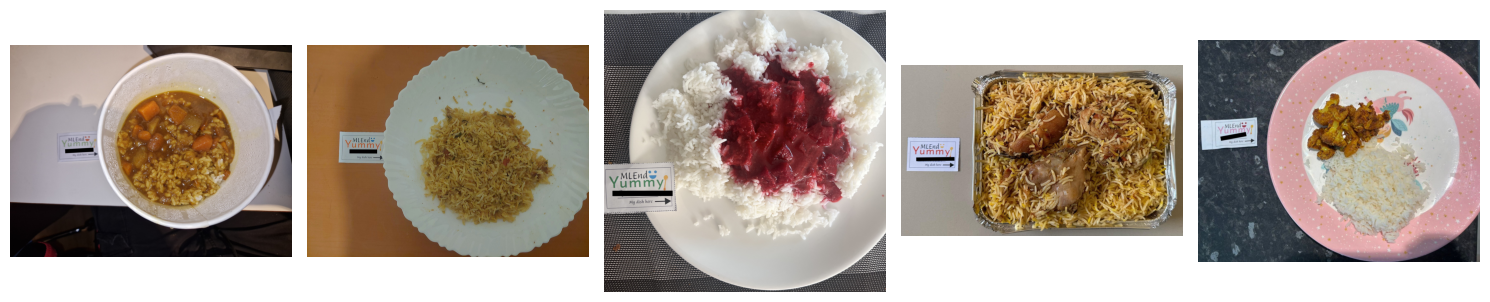

Chips


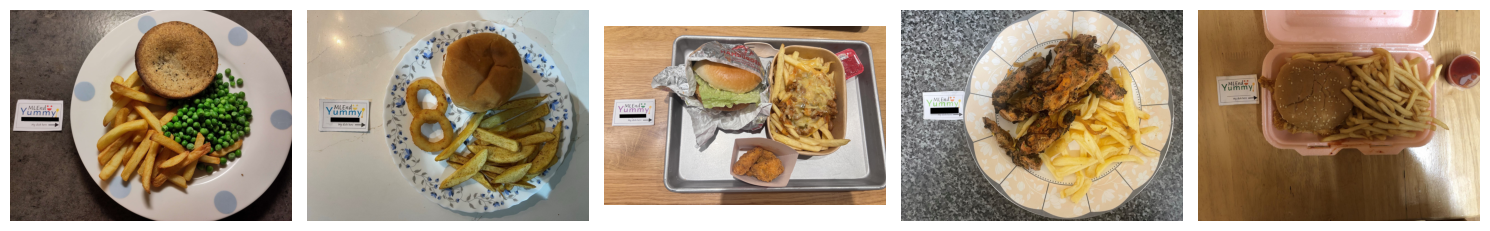

In [ ]:
# Visualising dishes before resizing
Chips_Img = np.array(X_train_paths)[Y_train==0]
Rice_Img = np.array(X_train_paths)[Y_train==1]

print('Rice')
plt.figure(figsize=(15,5))
for k,file in enumerate(Rice_Img[:5]):
  I = plt.imread(file)
  plt.subplot(1,5,k+1)
  plt.imshow(I)
  plt.axis('off')

plt.tight_layout()
plt.show()

print('Chips')
plt.figure(figsize=(15,5))
for k,file in enumerate(Chips_Img[:5]):
  I = plt.imread(file)
  plt.subplot(1,5,k+1)
  plt.imshow(I)
  plt.axis('off')

plt.tight_layout()
plt.show()

Plotting a few images after resizing all the images to a sqare size.

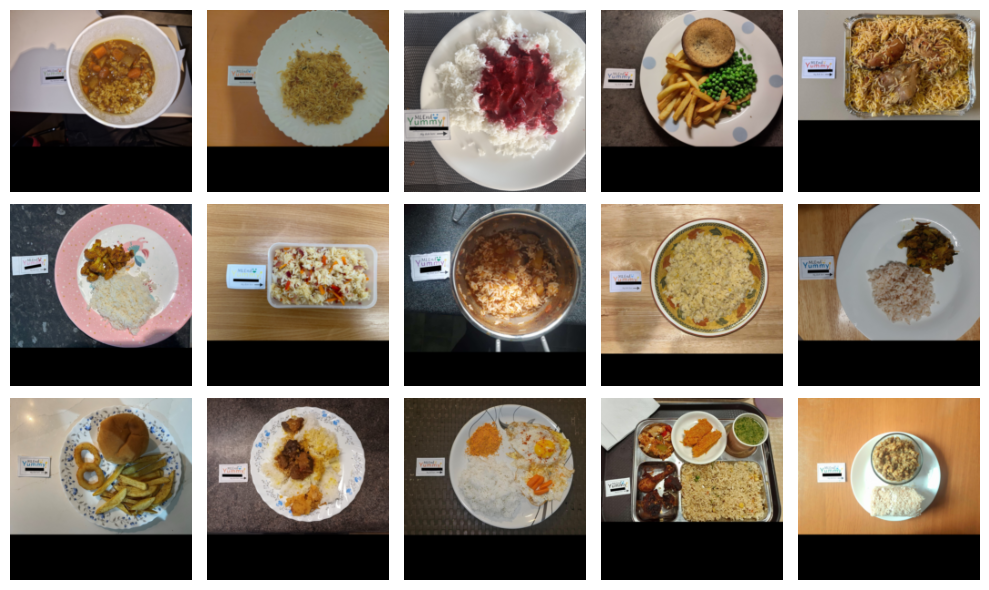

In [163]:
# Plotting a few images after resizing:

plt.figure(figsize=(10,6))
for k,I in enumerate(X_train):
  plt.subplot(3,5,k+1)
  plt.imshow(I)
  plt.axis('off')
  k+=1
  if k>=15:break
plt.tight_layout()
plt.show()

# Results

I've used three models in this project and plotted the Confusuion Matrix for each of them. The results for each of them are as follows:

**Model 1 : LinearSVC Model**

Training Accuracy of Linear SVC Model:	 0.8160919540229885

Test  Accuracy of Linear SVC Model:	 0.7926829268292683


**Model 2 : Decision Tree**

Training Accuracy of Decision Tree Model:	 1.0

Test  Accuracy of Decision Tree Model:	 0.6788617886178862

**Model 3 : Random Forest**

Training Accuracy of Random Forest Model:	 1.0

Test  Accuracy of Random Forest Model:	 0.7804878048780488

I also tried to use KNN but unfortunately it didn't work well and the code crashed.


# Conclusions

The best model is Random Forest Model according to the experiment done above. The results could have been better if there was more data.